<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réalisez une étude de santé publique avec R ou Python
</h2>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



Note jeremy 
Est ce qu'il faut faire le calcul de la sous nutrition sur les pays qu'on a ? 
Est ce qu'il faut faire des graphiques ?
Rajouter le soja
La liste des céréales est difficile a trouver ...

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [134]:
# Importation librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [135]:
#Importation du fichier population.csv
population = pd.read_csv(r'D:\data docs\OPC\P4\DAN-P4-FAO\population.csv')

#Importation du fichier dispo_alimentaire.csv
dispo_alimentaire = pd.read_csv(r'D:\data docs\OPC\P4\DAN-P4-FAO\dispo_alimentaire.csv')

#Importation du fichier aide_alimentaire.csv
aide_alimentaire = pd.read_csv(r'D:\data docs\OPC\P4\DAN-P4-FAO\aide_alimentaire.csv')

#Importation du fichier sous_nutrition.csv
sous_nutrition = pd.read_csv(r'D:\data docs\OPC\P4\DAN-P4-FAO\sous_nutrition.csv')

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier population</h3>
</div>

In [136]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(population.shape[0]))
print("Le tableau comporte {} colonne(s)".format(population.shape[1]))

Le tableau comporte 1416 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [137]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [138]:
# Consulter le nombre de colonnes
print("Nombre de colonnes :", population.shape[1])

# La nature des données dans chacune des colonnes
print("Nature des données dans chacune des colonnes :\n", population.dtypes)

# Le nombre de valeurs présentes dans chacune des colonnes
print("Nombre de valeurs présentes dans chacune des colonnes :\n", population.count())

Nombre de colonnes : 3
Nature des données dans chacune des colonnes :
 Zone       object
Année       int64
Valeur    float64
dtype: object
Nombre de valeurs présentes dans chacune des colonnes :
 Zone      1416
Année     1416
Valeur    1416
dtype: int64


In [139]:
#Affichage les 5 premières lignes de la table
print('les 5 premières lignes de la table Population :')
population.head()

les 5 premières lignes de la table Population :


,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [140]:
#Nous allons harmoniser les unités. Pour cela, nous avons décidé de multiplier la population par 1000
#Multiplication de la colonne valeur par 1000
population.iloc[:,2] *= 1000


In [141]:
#changement du nom de la colonne Valeur par Population
population = population.rename(columns={'Valeur':'Population'})


In [142]:
#Affichage les 5 premières lignes de la table pour voir les modifications
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.2 - Analyse exploratoire du fichier disponibilité alimentaire</h3>
</div>

In [143]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(dispo_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(dispo_alimentaire.shape[1]))

Le tableau comporte 15605 observation(s) ou article(s)
Le tableau comporte 18 colonne(s)


In [144]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", dispo_alimentaire.shape[1])

Nombre de colonnes : 18


In [145]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [146]:
#remplacement des NaN dans le dataset par des 0
dispo_alimentaire = dispo_alimentaire.fillna(0)
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0


In [147]:
dispo_alimentaire.head(2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0


In [148]:
#multiplication de toutes les lignes contenant des milliers de tonnes en Kg
dispo_alimentaire.iloc[:, [3,4,9,10,11,12,13,14,15,16,17]] *= 1000000

In [149]:
#Affichage les 5 premières lignes de la table
dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier aide alimentaire</h3>
</div>

In [150]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(aide_alimentaire.shape[0]))
print("Le tableau comporte {} colonne(s)".format(aide_alimentaire.shape[1]))

Le tableau comporte 1475 observation(s) ou article(s)
Le tableau comporte 4 colonne(s)


In [151]:
#Consulter le nombre de colonnes
print("Nombre de colonnes :", aide_alimentaire.shape[1])

Nombre de colonnes : 4


In [152]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [153]:
#changement du nom de la colonne Pays bénéficiaire par Zone
aide_alimentaire = aide_alimentaire.rename(columns={'Pays bénéficiaire' : 'Zone'})

In [154]:
aide_alimentaire

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504
...,...,...,...,...
1470,Zimbabwe,2015,Mélanges et préparations,96
1471,Zimbabwe,2013,Non-céréales,5022
1472,Zimbabwe,2014,Non-céréales,2310
1473,Zimbabwe,2015,Non-céréales,306


In [155]:
#Multiplication de la colonne Aide_alimentaire qui contient des tonnes par 1000 pour avoir des kg
aide_alimentaire.iloc[:,[3]] *= 1000

In [156]:
#Affichage les 5 premières lignes de la table
aide_alimentaire.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.3 - Analyse exploratoire du fichier sous nutrition</h3>
</div>

In [157]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(sous_nutrition.shape[0]))
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 1218 observation(s) ou article(s)
Le tableau comporte 3 colonne(s)


In [158]:
#Consulter le nombre de colonnes
print("Le tableau comporte {} colonne(s)".format(sous_nutrition.shape[1]))

Le tableau comporte 3 colonne(s)


In [159]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [160]:
#Conversion de la colonne sous nutrition en numérique
# sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'])

La conversion a échoué car des lignes contiennent des caractères de type « <0.1 ».On peut considérer que ce sont des valeurs suffisament faibles pour ne pas être précisées. Nous allons donc les remplacer par « 0 » avant de faire la conversion.

In [161]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
sous_nutrition['Valeur'] = pd.to_numeric(sous_nutrition['Valeur'], errors='coerce')
sous_nutrition = sous_nutrition.fillna(0)

In [162]:
#changement du nom de la colonne Valeur par sous_nutrition
sous_nutrition = sous_nutrition.rename(columns={'Valeur':'sous_nutrition'})

In [163]:
sous_nutrition

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5
...,...,...,...
1213,Zimbabwe,2013-2015,0.0
1214,Zimbabwe,2014-2016,0.0
1215,Zimbabwe,2015-2017,0.0
1216,Zimbabwe,2016-2018,0.0


In [164]:
#Multiplication de la colonne sous_nutrition par 1000000
sous_nutrition.iloc[:,[2]] *= 1000000

In [165]:
#Afficher les 5 premières lignes de la table
sous_nutrition.head(5)

,Zone,Année,sous_nutrition
0,Afghanistan,2012-2014,8600000.0
1,Afghanistan,2013-2015,8800000.0
2,Afghanistan,2014-2016,8900000.0
3,Afghanistan,2015-2017,9700000.0
4,Afghanistan,2016-2018,10500000.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.1 - Proportion de personnes en sous nutrition</h3>
</div>

In [166]:
# Convertir la colonne "Année" en chaînes de caractères
population['Année'] = population['Année'].astype(str)

# Sélectionner les données pour l'année 2017
population_2017 = population[population['Année'].str.contains('2017')]

In [167]:
population_2017.head(5)

,Zone,Année,Population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0


Population totale en 2017

In [168]:
pop_tot_2017 = population_2017['Population'].sum()
pop_tot_2017

7548134111.0

In [169]:

# Sélectionnez les données de sous-nutrition pour l'année 2017 dans toutes les plages d'années
sous_nutrition_2017_2 = sous_nutrition[sous_nutrition['Année'].str.contains('2016-2018')]

In [170]:
sous_nutrition_2017_2.head(5)

,Zone,Année,sous_nutrition
4,Afghanistan,2016-2018,10500000.0
10,Afrique du Sud,2016-2018,3100000.0
16,Albanie,2016-2018,100000.0
22,Algérie,2016-2018,1300000.0
28,Allemagne,2016-2018,0.0


In [171]:
# Il faut tout d'abord faire une jointure entre la table population et la table sous nutrition, en ciblant l'année 2017
# Effectuez une jointure entre les deux DataFrames sur la colonne 'Zone'
population_nutrition_2 = pd.merge(population_2017, sous_nutrition_2017_2, on='Zone')

In [172]:
#Affichage du dataset
population_nutrition_2.head(50)

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,3.629611e+07,2016-2018,10500000.0
1,Afrique du Sud,2017,5.700976e+07,2016-2018,3100000.0
2,Albanie,2017,2.884169e+06,2016-2018,100000.0
3,Algérie,2017,4.138919e+07,2016-2018,1300000.0
4,Allemagne,2017,8.265841e+07,2016-2018,0.0
5,Andorre,2017,7.700100e+04,2016-2018,0.0
6,Angola,2017,2.981677e+07,2016-2018,5800000.0
7,Antigua-et-Barbuda,2017,9.542600e+04,2016-2018,0.0
8,Arabie saoudite,2017,3.310118e+07,2016-2018,1600000.0
9,Argentine,2017,4.393714e+07,2016-2018,1500000.0


In [173]:
#Calcul et affichage du nombre de personnes en état de sous nutrition
total_personnes_sous_nutrition_2 = population_nutrition_2['sous_nutrition'].sum()

# Affichage du résultat
print("Le nombre total de personnes en état de sous-nutrition dans le monde en 2017 est de :", (total_personnes_sous_nutrition_2/1000000000).round(2), "milliards")

Le nombre total de personnes en état de sous-nutrition dans le monde en 2017 est de : 0.54 milliards


En pourcentage

In [174]:
per_ss_nourris = (total_personnes_sous_nutrition_2/pop_tot_2017)*100
per_ss_nourris
print("En 2017, {:.2f}% de la population étaient en sous-nutrition".format(per_ss_nourris))

En 2017, 7.10% de la population étaient en sous-nutrition


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.2 - Nombre théorique de personne qui pourrait être nourries</h3>
</div>

In [175]:
#Combien mange en moyenne un être humain ? Source => 
print('Pour notre exemple nous allons prendre 2500 Kcal')
print(' Source : https://www.levif.be/societe/sante/combien-de-calories-ingurgiter-selon-lage/')


Pour notre exemple nous allons prendre 2500 Kcal
 Source : https://www.levif.be/societe/sante/combien-de-calories-ingurgiter-selon-lage/


In [176]:
population.head()

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


In [177]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [178]:
#On commence par faire une jointure entre le data frame population et Dispo_alimentaire afin d'ajouter dans ce dernier la population
population_dispo_alimentaire = pd.merge(population, dispo_alimentaire, on='Zone')

In [179]:
#Affichage du nouveau dataframe
population_dispo_alimentaire

,Zone,Année,Population,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,2013,32269589.0,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,2013,32269589.0,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,2013,32269589.0,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,2013,32269589.0,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,2013,32269589.0,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92491,Zimbabwe,2018,14438802.0,Viande de Suides,animale,0.0,0.0,24.0,2.65,2.25,0.83,37000000.0,0.0,6000000.0,37000000.0,0.0,32000000.0,0.0,0.0,0.0
92492,Zimbabwe,2018,14438802.0,Viande de Volailles,animale,0.0,0.0,17.0,4.97,1.05,1.69,70000000.0,0.0,6000000.0,70000000.0,0.0,64000000.0,0.0,0.0,0.0
92493,Zimbabwe,2018,14438802.0,"Viande, Autre",animale,0.0,1000000.0,7.0,2.29,0.21,1.12,34000000.0,3000000.0,1000000.0,32000000.0,0.0,36000000.0,0.0,0.0,0.0
92494,Zimbabwe,2018,14438802.0,Vin,vegetale,0.0,0.0,1.0,0.27,0.00,0.00,4000000.0,0.0,2000000.0,4000000.0,0.0,2000000.0,0.0,0.0,0.0


In [180]:
#calcul pour 2017
population_dispo_alimentaire_2017 = population_dispo_alimentaire[population_dispo_alimentaire['Année'].str.contains('2017')]

In [267]:
#Création de la colonne dispo_kcal avec calcul des kcal disponibles mondialement Pour 2017
population_dispo_alimentaire_2017.loc[:,'dispo_kcal'] = population_dispo_alimentaire_2017['Disponibilité alimentaire (Kcal/personne/jour)']*population_dispo_alimentaire_2017['Population']
kcal_disponibles_mondialement_2017 = population_dispo_alimentaire_2017['dispo_kcal'].sum()
print('Nos calculs en 2017 suggerent que dans le monde entier, nous avions environ ', "{:,}".format(kcal_disponibles_mondialement_2017), 'Kcal disponible')

Nos calculs en 2017 suggerent que dans le monde entier, nous avions environ  20,918,984,627,331.0 Kcal disponible


Besoins en Kcal par Jour pour chaque personne : 

In [182]:
besoins_kcal_j_p = 2500

In [183]:
#Calcul du nombre d'humains pouvant être nourris
humains_nourris_2017=kcal_disponibles_mondialement_2017/besoins_kcal_j_p
humains_nourris=humains_nourris_2017
# Convertir en entier
humains_nourris_2017 = int(humains_nourris_2017)
print("Ce qui est ésquivant à {:,.0f} humains".format(humains_nourris_2017))

Ce qui est ésquivant à 8,367,593,850 humains


Voir en poucentage :


In [184]:
pop_tot_2017

7548134111.0

In [185]:
per_hu_nourris = (humains_nourris_2017 / pop_tot_2017)*100
print("Esquivant à {:.2f}% de la population en 2017".format(per_hu_nourris))

Esquivant à 110.86% de la population en 2017


Cela indique qu'en 2017 la quantité disponible etait largement supérieure par rapport aux besoins 

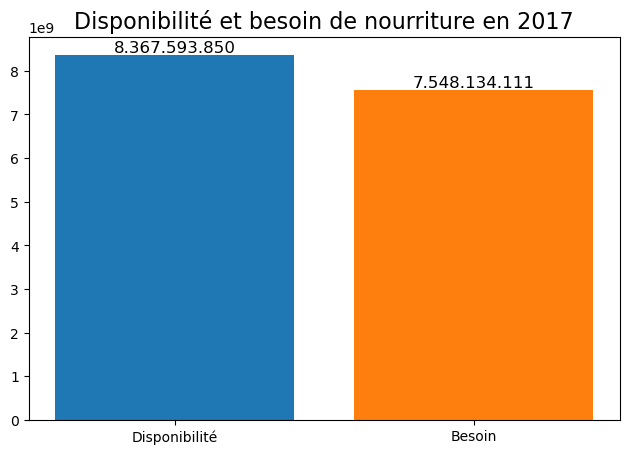

In [186]:
v_a_y = [humains_nourris_2017, pop_tot_2017]  
v_a_x = ['Disponibilité', 'Besoin']  

plt.bar(v_a_x, v_a_y, color=['C0', 'C1'])
for i in range(len(v_a_x)):
    plt.text(v_a_x[i], v_a_y[i] + 0.5, f"{int(v_a_y[i]):,.0f}".replace(',', '.'), ha='center', fontsize=12, va='bottom')

plt.title("Disponibilité et besoin de nourriture en 2017", fontsize=16) 
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.3 - Nombre théorique de personne qui pourrait être nourrie avec les produits végétaux</h3>
</div>

In [187]:
#Transfert des données avec les végétaux dans un nouveau dataframe
df_vegeteaux = population_dispo_alimentaire[population_dispo_alimentaire['Origine'].str.contains('vegetale')]

In [188]:
#Transfert des données 2017 avec les végétaux dans un nouveau dataframe
df_vegeteaux_2017 = population_dispo_alimentaire_2017[population_dispo_alimentaire_2017['Origine'].str.contains('vegetale')]

In [268]:
#Calcul du nombre de kcal disponible pour les végétaux
df_vegeteaux_2017.loc[:,'dispo_kal'] = df_vegeteaux_2017['Disponibilité alimentaire (Kcal/personne/jour)']*df_vegeteaux_2017['Population']
kcal_vegetale_2017= df_vegeteaux_2017['dispo_kal'].sum()
print('Nombre de kcal disponible pour les végétaux est de :', "{:,}".format(kcal_vegetale_2017))

Nombre de kcal disponible pour les végétaux est de : 17,260,764,211,501.0


In [190]:
#Calcul du nombre d'humains pouvant être nourris avec les végétaux
nour_vegetale_2017 = kcal_vegetale_2017/besoins_kcal_j_p
nour_vegetale_2017.round(0)
nour_vegetale_2017=int(nour_vegetale_2017)
print("nombre d'humains pouvant être nourris avec les végétaux", "{:,}".format(nour_vegetale_2017), 'humains')

nombre d'humains pouvant être nourris avec les végétaux 6,904,305,684 humains


In [191]:
per_hu_nourris_veg = (nour_vegetale_2017 / pop_tot_2017)*100
print("Esquivant à {:.2f}% de la population en 2017".format(per_hu_nourris_veg))

Esquivant à 91.47% de la population en 2017


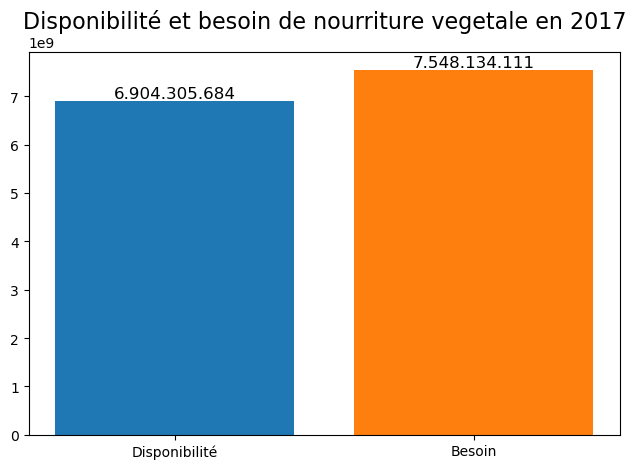

In [192]:
v_v_y = [nour_vegetale_2017, pop_tot_2017]  
v_v_x = ['Disponibilité', 'Besoin']  

plt.bar(v_v_x, v_v_y, color=['C0', 'C1'])
for i in range(len(v_v_x)):
    plt.text(v_v_x[i], v_v_y[i] + 0.5, f"{int(v_v_y[i]):,.0f}".replace(',', '.'), ha='center', fontsize=12, va='bottom')

plt.title("Disponibilité et besoin de nourriture vegetale en 2017", fontsize=16) 
plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.4 - Utilisation de la disponibilité intérieure</h3>
</div>

In [193]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


In [194]:
#Calcul de la disponibilité totale
#Equation Production + Importations - Exportations + Variation de stock=Disponibilité intérieure=Semences + Pertes + Nourriture + Aliments pour animaux + Traitement + Autres utilisations
disponibilite_totale = dispo_alimentaire['Disponibilité intérieure'].sum()
print("disponibilité totale interieure", disponibilite_totale)

disponibilité totale interieure 9848994000000.0


In [195]:
dispo_alimentaire.head(2)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0


In [196]:
#création d'une boucle for pour afficher les différentes valeurs en fonction des colonnes aliments pour animaux, pertes, nourritures, 
colonnes_dispo_aliment_APN = ["Aliments pour animaux", "Pertes", "Nourriture"]
for i in colonnes_dispo_aliment_APN:
    # Calculer la somme des valeurs de la colonne
    per_valeurs = dispo_alimentaire[i].sum()/disponibilite_totale*100
    # Afficher la somme des valeurs pour la colonne
    print("pourcentage des valeurs pour la colonne", i, ":", per_valeurs.round(2),'%')

pourcentage des valeurs pour la colonne Aliments pour animaux : 13.24 %
pourcentage des valeurs pour la colonne Pertes : 4.61 %
pourcentage des valeurs pour la colonne Nourriture : 49.51 %


In [197]:
# Parcourir chaque colonne dans la liste existante

for i in dispo_alimentaire.columns[3:]:
    somme_valeurs_colonne = dispo_alimentaire[i].sum()
    print("Somme des valeurs pour la colonne", i, ":", somme_valeurs_colonne)


Somme des valeurs pour la colonne Aliments pour animaux : 1304245000000.0
Somme des valeurs pour la colonne Autres Utilisations : 865023000000.0
Somme des valeurs pour la colonne Disponibilité alimentaire (Kcal/personne/jour) : 495442.0
Somme des valeurs pour la colonne Disponibilité alimentaire en quantité (kg/personne/an) : 122201.94
Somme des valeurs pour la colonne Disponibilité de matière grasse en quantité (g/personne/jour) : 15133.01
Somme des valeurs pour la colonne Disponibilité de protéines en quantité (g/personne/jour) : 14146.13
Somme des valeurs pour la colonne Disponibilité intérieure : 9848994000000.0
Somme des valeurs pour la colonne Exportations - Quantité : 1352158000000.0
Somme des valeurs pour la colonne Importations - Quantité : 1296053000000.0
Somme des valeurs pour la colonne Nourriture : 4876258000000.0
Somme des valeurs pour la colonne Pertes : 453698000000.0
Somme des valeurs pour la colonne Production : 10009680000000.0
Somme des valeurs pour la colonne Semen

Répartition de la disponibilité alimentaire en calcul :

In [198]:
for i in ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']:
    per_valeurs_colonne_dis_int = (dispo_alimentaire[i].sum() / disponibilite_totale) * 100
    print("Pourcentage des valeurs pour la colonne", i, ":", per_valeurs_colonne_dis_int.round(2),'%')


Pourcentage des valeurs pour la colonne Aliments pour animaux : 13.24 %
Pourcentage des valeurs pour la colonne Autres Utilisations : 8.78 %
Pourcentage des valeurs pour la colonne Nourriture : 49.51 %
Pourcentage des valeurs pour la colonne Pertes : 4.61 %
Pourcentage des valeurs pour la colonne Semences : 1.57 %
Pourcentage des valeurs pour la colonne Traitement : 22.38 %


Répartition de la disponibilité alimentaire :

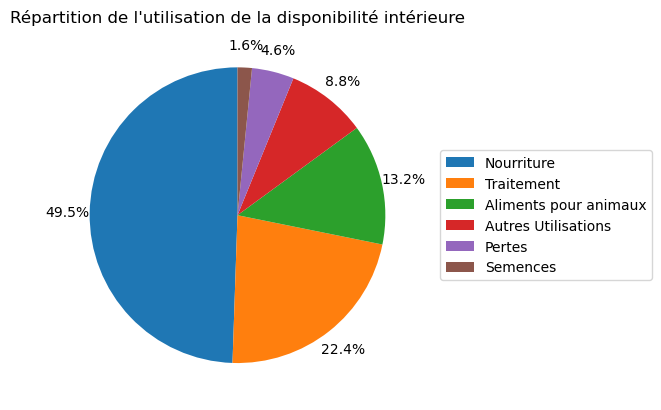

In [199]:
#création de la liste de données pour la disponibilité alimentaire : 
Disponibilite_int = dispo_alimentaire[['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']].sum().sort_values(ascending=False)
Disponibilite_int
#création de graph : 
plt.pie(Disponibilite_int.values, autopct='%.1f%%',pctdistance=1.15,startangle=90)
plt.title('Répartition de l\'utilisation de la disponibilité intérieure')
plt.legend(Disponibilite_int.index, loc=7,bbox_to_anchor=(1.64, 0.5))
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.5 - Utilisation des céréales</h3>
</div>

In [200]:
# Sélectionner la colonne 'Produit' 
produits_distincts = dispo_alimentaire['Produit'].drop_duplicates()

# Afficher les produits 
print(produits_distincts)

0             Abats Comestible
1              Agrumes, Autres
2        Aliments pour enfants
3                       Ananas
4                      Bananes
                 ...          
141                     Sorgho
150           Viande de Suides
1295       Huile de Son de Riz
1336      Sucre non centrifugé
2892    Viande de Anim Aquatiq
Name: Produit, Length: 98, dtype: object


In [269]:
#Création d'une liste avec toutes les variables
# Création liste céréales (source: FAOSTAT)
liste_cereales = ["Blé", "Riz (Eq Blanchi)", "Orge", "Maïs", "Seigle","Avoine", "Millet", "Sorgho", "Céréales, Autres"]
liste_cereales

['Blé',
 'Riz (Eq Blanchi)',
 'Orge',
 'Maïs',
 'Seigle',
 'Avoine',
 'Millet',
 'Sorgho',
 'Céréales, Autres']

In [270]:
# Filtrer les données pour les céréales 
df_cereales = dispo_alimentaire[dispo_alimentaire['Produit'].isin(liste_cereales)]
df_cereales.head(5)


,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0


Verifier les produits vegetaux :

In [271]:
#Vérifier les aliments vegetaux de notre DF
origine_vegetale = dispo_alimentaire[dispo_alimentaire['Origine']=='vegetale']['Produit'].unique()
origine_vegetale

array(['Agrumes, Autres', 'Aliments pour enfants', 'Ananas', 'Bananes',
       'Bière', 'Blé', 'Boissons Alcooliques', 'Café',
       'Coco (Incl Coprah)', 'Céréales, Autres', 'Dattes',
       'Edulcorants Autres', 'Feve de Cacao', 'Fruits, Autres',
       'Graines de coton', 'Graines de tournesol',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Légumes, Autres', 'Légumineuses Autres',
       'Maïs', 'Miel', 'Millet', 'Miscellanees', 'Noix', 'Olives',
       'Oranges, Mandarines', 'Orge', 'Plantes Oleiferes, Autre',
       'Poivre', 'Pommes', 'Pommes de Terre', 'Raisin',
       'Riz (Eq Blanchi)', 'Sucre Eq Brut', 'Sucre, betterave',
       'Sucre, canne', 'Sésame', 'Thé', 'Tomates', 'Vin',
       'Épices, Autres', 'Alcool, non Comestible',
       'Arachides Decortiquees', 'Avoine', 'Bananes plantains',
       'Bo

Calculer la Quantité de cereales utilisée pour la nourriture humaine et animale :

In [272]:
#Calculer la Quantité de cereales utilisée pour la nourriture animale
alimenation_animale_cereale = df_cereales['Aliments pour animaux'].sum()
alimenation_animale_cereale
print("Quantité de cereales utilisée pour la nourriture animale est de :",alimenation_animale_cereale, "Kg")

Quantité de cereales utilisée pour la nourriture animale est de : 873535000000.0 Kg


In [273]:
#Calculer la Quantité de cereales utilisée pour la nourriture humaine
alimenation_humaine_cereale = df_cereales['Nourriture'].sum()
alimenation_humaine_cereale
print("Quantité de cereales utilisée pour la nourriture humaine est de :",alimenation_humaine_cereale, "Kg")

Quantité de cereales utilisée pour la nourriture humaine est de : 1029010000000.0 Kg


Part de l’utilisation des principales céréales entre l’alimentation humaine et animale

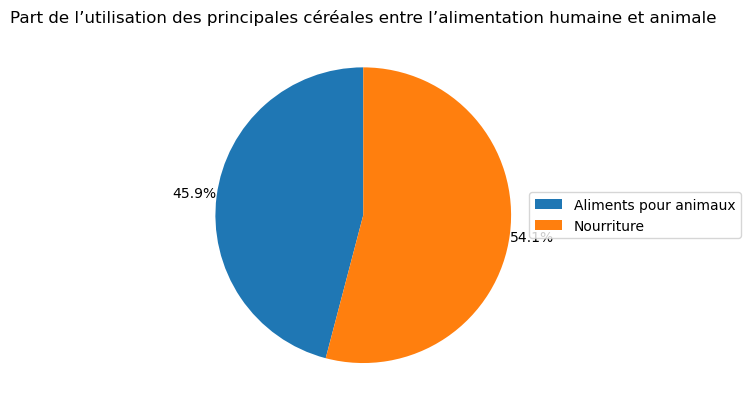

In [274]:
utilisation_cereales = (df_cereales[['Aliments pour animaux','Nourriture',]]
    .sum()
)
plt.pie(utilisation_cereales.values, autopct = '%.1f%%', pctdistance = 1.15, startangle = 90)
plt.title("Part de l’utilisation des principales céréales entre l’alimentation humaine et animale")
plt.legend(utilisation_cereales.index, loc = 7, bbox_to_anchor=(1.54, 0.5))
plt.show()

In [282]:
#Calculer la Quantité de cereales utilisée pour la nourriture animale
alimenation_per_animale_cereale = (df_cereales['Aliments pour animaux'].sum()/df_cereales['Disponibilité intérieure'].sum())*100
alimenation_per_animale_cereale
print("Quantité de cereales utilisée pour la nourriture animale est de :",alimenation_per_animale_cereale.round(2), "%")

Quantité de cereales utilisée pour la nourriture animale est de : 36.29 %


In [283]:
#Calculer la Quantité de cereales utilisée pour la nourriture humaine
alimenation_per_humaine_cereale = (df_cereales['Nourriture'].sum()/df_cereales['Disponibilité intérieure'].sum())*100
alimenation_per_humaine_cereale
print("Quantité de cereales utilisée pour la nourriture humaine est de :",alimenation_per_humaine_cereale.round(2), "%")

Quantité de cereales utilisée pour la nourriture humaine est de : 42.75 %


In [344]:
utilisation_per_cereales = (df_cereales[['Aliments pour animaux','Nourriture',]].sum()/df_cereales['Disponibilité intérieure'].sum())
utilisation_per_cereales

Aliments pour animaux    0.362915
Nourriture               0.427507
dtype: float64

In [353]:
per_autre = 100-(alimenation_per_animale_cereale + alimenation_per_humaine_cereale)
per = [alimenation_per_animale_cereale, alimenation_per_humaine_cereale, per_autre]

In [354]:
per_autre

20.95779848682946

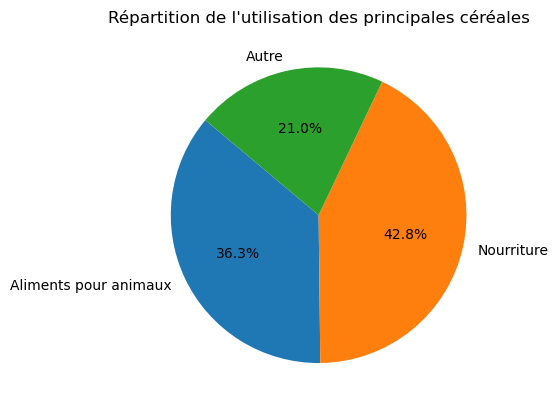

In [355]:
legend = ['Aliments pour animaux', 'Nourriture', 'Autre']
plt.pie(per, labels=legend, autopct='%1.1f%%', startangle=140)
plt.title("Répartition de l'utilisation des principales céréales")
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.6 - Pays avec la proportion de personnes sous-alimentée la plus forte en 2017</h3>
</div>

In [ ]:
population_nutrition_2

,Zone,Année_x,Population,Année_y,sous_nutrition
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0
2,Albanie,2017,2884169.0,2016-2018,100000.0
3,Algérie,2017,41389189.0,2016-2018,1300000.0
4,Allemagne,2017,82658409.0,2016-2018,0.0
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402484.0,2016-2018,8000000.0
199,Viet Nam,2017,94600648.0,2016-2018,6500000.0
200,Yémen,2017,27834819.0,2016-2018,0.0
201,Zambie,2017,16853599.0,2016-2018,0.0


In [287]:
#Création de la colonne proportion par pays
population_nutrition_2['Proportion'] = (population_nutrition_2['sous_nutrition']/population_nutrition_2['Population'])*100
population_nutrition_2['Proportion']
population_nutrition_2.head()

,Zone,Année_x,Population,Année_y,sous_nutrition,Proportion
0,Afghanistan,2017,36296113.0,2016-2018,10500000.0,28.928718
1,Afrique du Sud,2017,57009756.0,2016-2018,3100000.0,5.437666
2,Albanie,2017,2884169.0,2016-2018,100000.0,3.467203
3,Algérie,2017,41389189.0,2016-2018,1300000.0,3.140917
4,Allemagne,2017,82658409.0,2016-2018,0.0,0.000000


In [288]:
#affichage après trie des 10 pires pays
sous_pays_pires = population_nutrition_2.sort_values(by='Proportion', ascending=False)

# Affichage des 10 pires pays
sous_pays_pires_10 = sous_pays_pires.loc[:,['Zone','Proportion']].head(10)
sous_pays_pires_10


,Zone,Proportion
78,Haïti,48.259182
157,République populaire démocratique de Corée,47.188685
108,Madagascar,41.062924
103,Libéria,38.279742
100,Lesotho,38.249438
183,Tchad,37.957606
161,Rwanda,35.055619
121,Mozambique,32.810898
186,Timor-Leste,32.173531
0,Afghanistan,28.928718


In [289]:
sous_pays_pires_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 78 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Zone        10 non-null     object 
 1   Proportion  10 non-null     float64
dtypes: float64(1), object(1)
memory usage: 240.0+ bytes


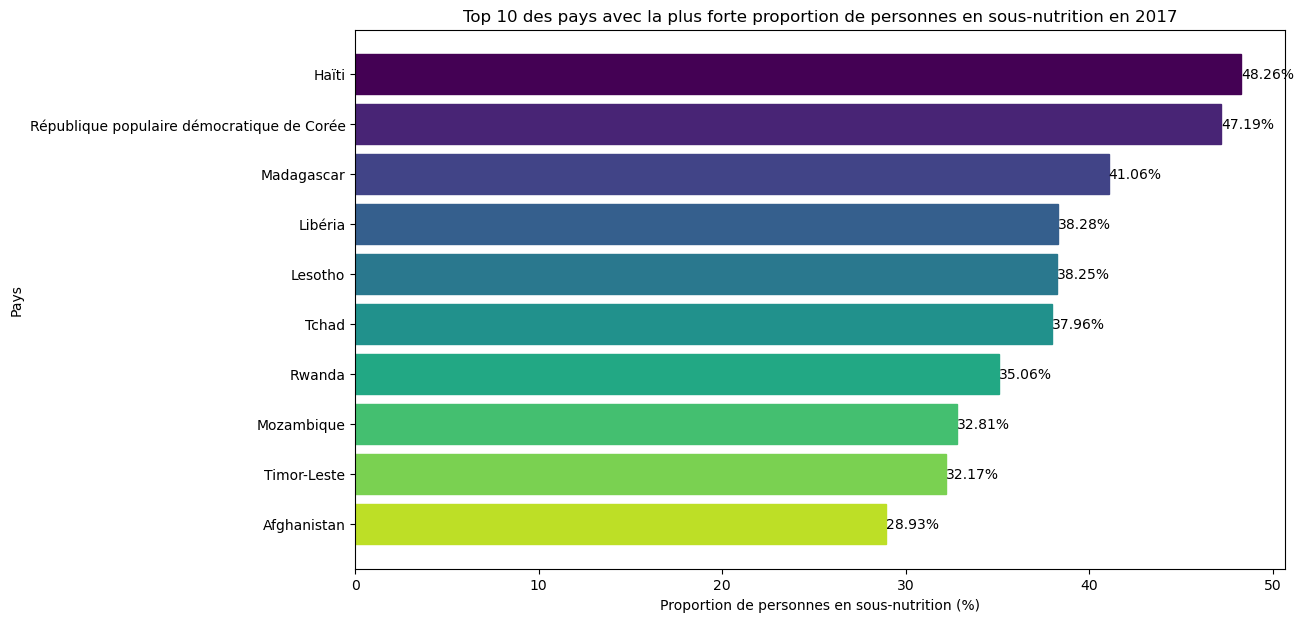

In [290]:
x_ss_n = sous_pays_pires_10['Zone']
y_ss_n = sous_pays_pires_10['Proportion']
plt.figure(figsize=(12, 7))
bars = plt.barh(x_ss_n, y_ss_n)

for i, bar in enumerate(bars):
    bar.set_color(plt.cm.viridis(i / len(x_ss_n))) 
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{y_ss_n.iloc[i]:,.2f}%', va='center', ha='left', fontsize=10)

plt.xlabel('Proportion de personnes en sous-nutrition (%)')
plt.ylabel('Pays')
plt.title('Top 10 des pays avec la plus forte proportion de personnes en sous-nutrition en 2017')

plt.gca().invert_yaxis()

plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.7 - Pays qui ont le plus bénéficié d'aide alimentaire depuis 2013</h3>
</div>

In [291]:
aide_alimentaire.head(5)

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [292]:
#calcul du total de l'aide alimentaire par pays

total_aide_alimentaire_par_pays = aide_alimentaire.groupby('Zone').sum()
total_aide_alimentaire_par_pays = total_aide_alimentaire_par_pays.reset_index(level='Zone')
total_aide_alimentaire_par_pays = total_aide_alimentaire_par_pays.loc[:,['Zone','Valeur']]
total_aide_alimentaire_par_pays

,Zone,Valeur
0,Afghanistan,185452000
1,Algérie,81114000
2,Angola,5014000
3,Bangladesh,348188000
4,Bhoutan,2666000
...,...,...
71,Zambie,3026000
72,Zimbabwe,62570000
73,Égypte,1122000
74,Équateur,1362000


In [293]:
#affichage après trie des 10 pays qui ont bénéficié le plus de l'aide alimentaire
total_aide_alimentaire_par_pays_10 = total_aide_alimentaire_par_pays.sort_values(by='Valeur', ascending=False).head(10)
total_aide_alimentaire_par_pays_10

,Zone,Valeur
50,République arabe syrienne,1858943000
75,Éthiopie,1381294000
70,Yémen,1206484000
61,Soudan du Sud,695248000
60,Soudan,669784000
30,Kenya,552836000
3,Bangladesh,348188000
59,Somalie,292678000
53,République démocratique du Congo,288502000
43,Niger,276344000


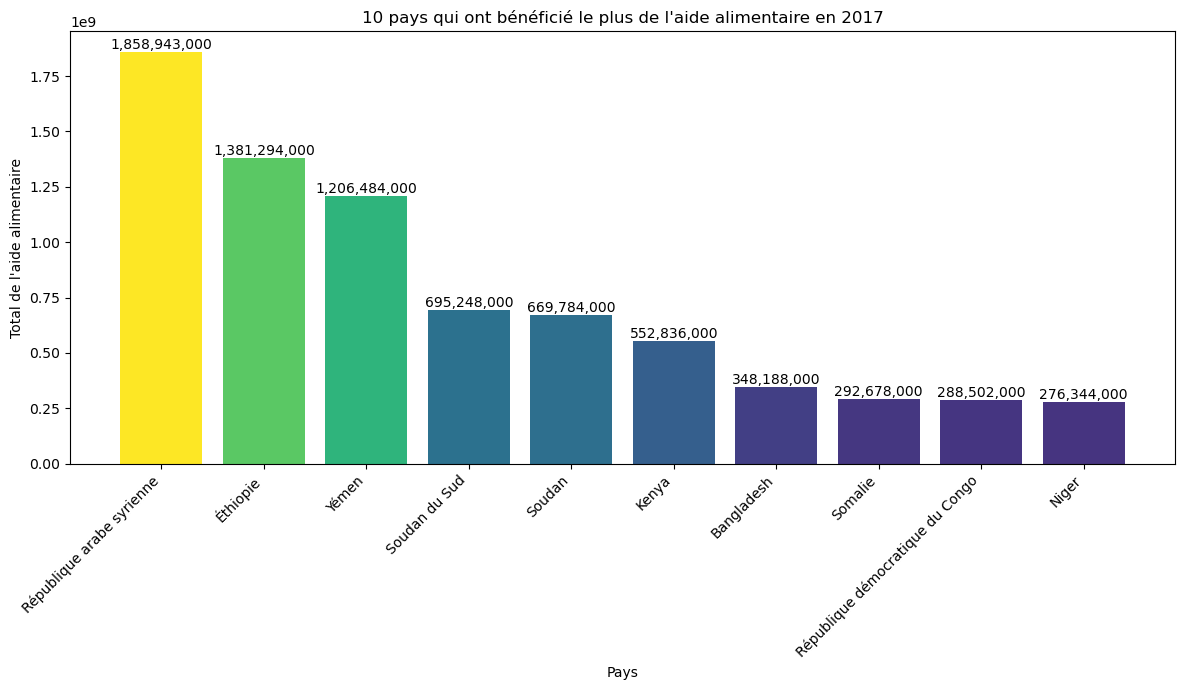

In [294]:
x_p_n = total_aide_alimentaire_par_pays_10['Zone']
y_p_n = total_aide_alimentaire_par_pays_10['Valeur']
# Création du graphique en forme de podium
plt.figure(figsize=(12, 7))
bars = plt.bar(x_p_n, y_p_n, color=plt.cm.viridis(y_p_n / max(y_p_n)))

# Ajout des annotations (valeurs) au-dessus des barres
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{y_p_n.iloc[i]:,.0f}', ha='center', va='bottom', fontsize=10)

# Ajout des étiquettes et du titre
plt.xlabel("Pays")
plt.ylabel("Total de l'aide alimentaire")
plt.title("10 pays qui ont bénéficié le plus de l'aide alimentaire en 2017")

# Rotation des étiquettes sur l'axe des x pour éviter les chevauchements
plt.xticks(rotation=45, ha='right')

# Affichage du graphique
plt.tight_layout()
plt.show()

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.8 - Evolution des 5 pays qui ont le plus bénéficiés de l'aide alimentaire entre 2013 et 2016</h3>
</div>

In [295]:
aide_alimentaire.head()

,Zone,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [296]:
#Création d'un dataframe avec la zone, l'année et l'aide alimentaire puis groupby sur zone et année 
aide_alimentaire_2 = aide_alimentaire.iloc[:,[0,1,3]]
aide_alimentaire_3 = aide_alimentaire_2.groupby(['Zone','Année']).sum().reset_index()
aide_alimentaire_3.head(20)

,Zone,Année,Valeur
0,Afghanistan,2013,128238000
1,Afghanistan,2014,57214000
2,Algérie,2013,35234000
3,Algérie,2014,18980000
4,Algérie,2015,17424000
5,Algérie,2016,9476000
6,Angola,2013,5000000
7,Angola,2014,14000
8,Bangladesh,2013,131018000
9,Bangladesh,2014,194628000


In [297]:
#Création d'une liste contenant les 5 pays qui ont le plus bénéficiées de l'aide alimentaire

aide_par_pays = aide_alimentaire_2.groupby('Zone')['Valeur'].sum()
top_5_pays = aide_par_pays.sort_values(ascending=False).head(5)
top_5_pays_df = top_5_pays.reset_index()
print("Les 5 pays qui ont le plus bénéficié de l'aide alimentaire sont :\n", top_5_pays_df)


Les 5 pays qui ont le plus bénéficié de l'aide alimentaire sont :
                         Zone      Valeur
0  République arabe syrienne  1858943000
1                   Éthiopie  1381294000
2                      Yémen  1206484000
3              Soudan du Sud   695248000
4                     Soudan   669784000


In [298]:
top_5_pays_df.head(5)

,Zone,Valeur
0,République arabe syrienne,1858943000
1,Éthiopie,1381294000
2,Yémen,1206484000
3,Soudan du Sud,695248000
4,Soudan,669784000


In [299]:
# Convertir la colonne "Zone" en une liste
liste_top_5_pays = top_5_pays_df['Zone'].tolist()
liste_top_5_pays

['République arabe syrienne', 'Éthiopie', 'Yémen', 'Soudan du Sud', 'Soudan']

In [300]:
#On filtre sur le dataframe avec notre liste
df_filtre_liste = aide_alimentaire[aide_alimentaire['Zone'].isin(liste_top_5_pays)]
df_filtre_liste

,Zone,Année,Produit,Valeur
354,Éthiopie,2013,Autres non-céréales,170000
355,Éthiopie,2014,Autres non-céréales,466000
356,Éthiopie,2015,Autres non-céréales,244000
357,Éthiopie,2013,Blé et Farin,181066000
358,Éthiopie,2014,Blé et Farin,178646000
...,...,...,...,...
1447,Yémen,2015,"Riz, total",1797000
1448,Yémen,2013,"Sucre, total",161000
1449,Yémen,2014,"Sucre, total",81000
1450,Yémen,2015,"Sucre, total",7617000


In [301]:
# Affichage des pays avec l'aide alimentaire par année
df_filtre_liste_pays = df_filtre_liste.groupby(['Zone','Année']).sum()
df_filtre_liste_pays

Produit  \
Zone                      Année                                                      
République arabe syrienne 2013   Autres non-céréalesBlé et FarinBulgurFarEntCér...   
                          2014   Autres non-céréalesBlé et FarinBulgurFarEntCér...   
                          2015   Autres non-céréalesBlé et FarinBulgurFarEntCér...   
                          2016   Blé et FarinBulgurFarEntCéréalesLégumineuses S...   
Soudan                    2013   CéréalesCéréales SecondairesHuiles végétalesLa...   
                          2014   Autres non-céréalesBlé et FarinCéréalesCéréale...   
                          2015   Autres non-céréalesBlé et FarinCéréalesHuiles ...   
Soudan du Sud             2013   Autres non-céréalesCéréalesCéréales Secondaire...   
                          2014   Autres non-céréalesCéréalesCéréales Secondaire...   
                          2015   Autres non-céréalesCéréalesCéréales Secondaire...   
Yémen                     2013   Autres non-céréalesBlé et FarinCéréalesHuiles ...   
                          2014   Autres non-céréalesBlé et FarinCéréalesHuiles ...   
                          2015   Autres non-céréalesBlé et FarinCéréalesHuiles ...   
                          2016   Autres non-céréalesBlé et FarinCéréalesFruits ...   
Éthiopie                  2013   Autres non-céréalesBlé et FarinBulgurFarEntCér...   
                          2014   Autres non-céréalesBlé et FarinBulgurFarEntCér...   
                          2015   Autres non-céréalesBlé et FarinCéréalesCéréale...   

                                    Valeur  
Zone                      Année             
République arabe syrienne 2013   563566000  
                          2014   651870000  
                          2015   524949000  
                          2016   118558000  
Soudan                    2013   330230000  
                          2014   321904000  
                          2015    17650000  
Soudan du Sud             2013   196330000  
                          2014   450610000  
                          2015    48308000  
Yémen                     2013   264764000  
                          2014   103840000  
                          2015   372306000  
                          2016   465574000  
Éthiopie                  2013   591404000  
                          2014   586624000  
                          2015   203266000

In [302]:
pays_annees_valeurs = df_filtre_liste_pays.reset_index().set_index(['Zone', 'Année'])['Valeur']
pays_annees_valeurs

Zone                       Année
République arabe syrienne  2013     563566000
                           2014     651870000
                           2015     524949000
                           2016     118558000
Soudan                     2013     330230000
                           2014     321904000
                           2015      17650000
Soudan du Sud              2013     196330000
                           2014     450610000
                           2015      48308000
Yémen                      2013     264764000
                           2014     103840000
                           2015     372306000
                           2016     465574000
Éthiopie                   2013     591404000
                           2014     586624000
                           2015     203266000
Name: Valeur, dtype: int64

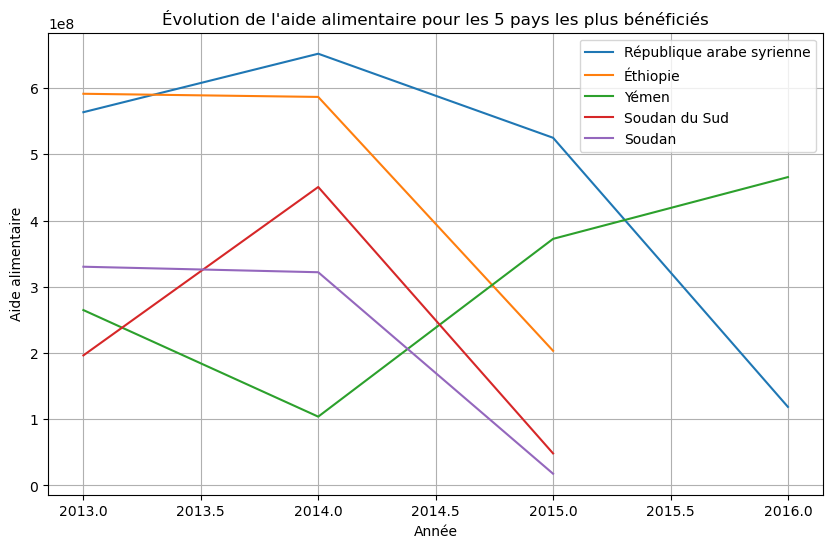

In [303]:
plt.figure(figsize=(10, 6))
for i in liste_top_5_pays:
    data_pays = pays_annees_valeurs.loc[i]
    plt.plot(data_pays.index, data_pays.values, label=i)

plt.legend()
plt.title("Évolution de l'aide alimentaire pour les 5 pays les plus bénéficiés")
plt.xlabel('Année')
plt.ylabel("Aide alimentaire")

plt.grid(True)
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.9 - Pays avec le moins de disponibilité par habitant</h3>
</div>

In [304]:
dispo_alimentaire

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3000000.0,0.0,0.0,3000000.0,0.0,2000000.0,0.0,0.0,0.0
15601,Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
15602,Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15603,Îles Salomon,Vin,vegetale,0.0,0.0,0.0,0.07,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [305]:
#Calcul de la disponibilité en kcal par personne par jour par pays
dispo_alimentaire_personne = dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']].groupby('Zone').sum('Disponibilité alimentaire (Kcal/personne/jour)')

In [306]:
dispo_alimentaire_personne

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Émirats arabes unis,3275.0
Équateur,2346.0
États-Unis d'Amérique,3682.0


In [307]:
#Affichage des 10 pays qui ont le moins de dispo alimentaire par personne 
print('les 10 pays qui ont le moins de dispo alimentaire par personne  \n')
dispo_alimentaire_faible_10 = dispo_alimentaire_personne.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=True).head(10)
dispo_alimentaire_faible_10

les 10 pays qui ont le moins de dispo alimentaire par personne  



,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


In [308]:
dispo_alimentaire_faible_10.reset_index('Zone', inplace=True)

In [309]:
dispo_alimentaire_faible_10

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
0,République centrafricaine,1879.0
1,Zambie,1924.0
2,Madagascar,2056.0
3,Afghanistan,2087.0
4,Haïti,2089.0
5,République populaire démocratique de Corée,2093.0
6,Tchad,2109.0
7,Zimbabwe,2113.0
8,Ouganda,2126.0
9,Timor-Leste,2129.0


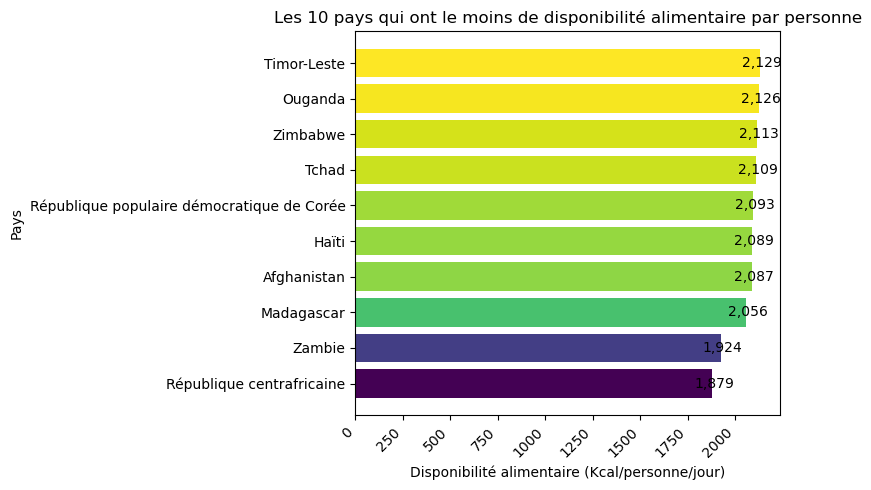

In [310]:
plt.figure(figsize=(8, 5))
b_d_f = dispo_alimentaire_faible_10['Disponibilité alimentaire (Kcal/personne/jour)']
b_z_f = dispo_alimentaire_faible_10["Zone"]
bars_2= plt.barh(b_z_f, b_d_f, color=plt.cm.viridis((b_d_f - min(b_d_f)) / (max(b_d_f) - min(b_d_f))))

for i, bar in enumerate(bars_2):
                plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, f'{b_d_f.iloc[i]:,.0f}', ha='center', va='center', fontsize=10)

plt.xlabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.ylabel("Pays")
plt.title("Les 10 pays qui ont le moins de disponibilité alimentaire par personne")

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.10 - Pays avec le plus de disponibilité par habitant</h3>
</div>

In [311]:
#Affichage des 10 pays qui ont le plus de dispo alimentaire par personne 
print('les 10 pays qui ont le plus de dispo alimentaire par personne \n')
dispo_alimentaire_forte_10 = dispo_alimentaire_personne.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)
dispo_alimentaire_forte_10

les 10 pays qui ont le plus de dispo alimentaire par personne 



,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


In [312]:
dispo_alimentaire_forte_10.reset_index('Zone', inplace=True)
dispo_alimentaire_forte_10
dispo_alimentaire_forte_10 = dispo_alimentaire_forte_10.sort_values(by='Disponibilité alimentaire (Kcal/personne/jour)', ascending=True)

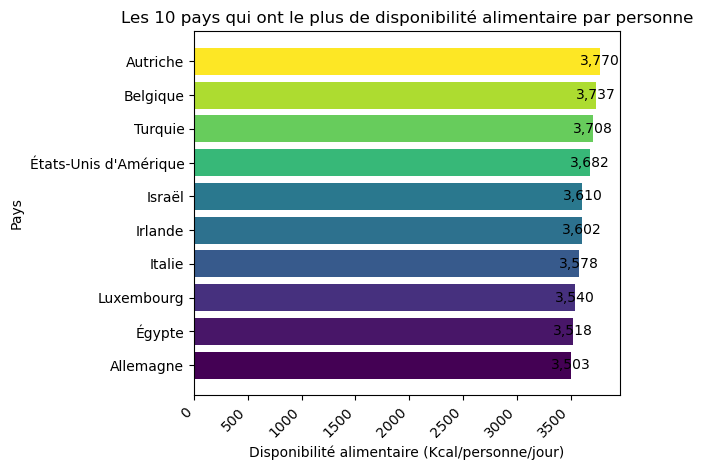

In [313]:
b_d_fo = dispo_alimentaire_forte_10['Disponibilité alimentaire (Kcal/personne/jour)']
b_z_fo = dispo_alimentaire_forte_10["Zone"]

bars_2 = plt.barh(b_z_fo, b_d_fo, color=cm.viridis((b_d_fo - min(b_d_fo)) / (max(b_d_fo) - min(b_d_fo))))

for i, bar in enumerate(bars_2):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{b_d_fo.iloc[i]:,.0f}',ha='center', va='center', fontsize=10)

plt.xlabel("Disponibilité alimentaire (Kcal/personne/jour)")
plt.ylabel("Pays")
plt.title("Les 10 pays qui ont le plus de disponibilité alimentaire par personne")

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [314]:
dispo_alimentaire_forte_10

,Zone,Disponibilité alimentaire (Kcal/personne/jour)
9,Allemagne,3503.0
8,Égypte,3518.0
7,Luxembourg,3540.0
6,Italie,3578.0
5,Irlande,3602.0
4,Israël,3610.0
3,États-Unis d'Amérique,3682.0
2,Turquie,3708.0
1,Belgique,3737.0
0,Autriche,3770.0


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">3.11 - Exemple de la Thaïlande pour le Manioc</h3>
</div>

In [315]:
#création d'un dataframe avec uniquement la Thaïlande 
sous_nutrition_th = population_nutrition_2[population_nutrition_2['Zone']=='Thaïlande']
sous_nutrition_th

,Zone,Année_x,Population,Année_y,sous_nutrition,Proportion
185,Thaïlande,2017,69209810.0,2016-2018,6200000.0,8.958268


In [341]:
print('Part de personnes en état de sous- nutrition en Thaïlande', (sous_nutrition_th.iloc[0,5]).round(2),"%")

Part de personnes en état de sous- nutrition en Thaïlande 8.96 %


In [317]:
disp_a_th = dispo_alimentaire[dispo_alimentaire['Zone']=='Thaïlande']
disp_a_th_dp = disp_a_th['Disponibilité alimentaire en quantité (kg/personne/an)'].sum()

In [318]:
disp_a_th_manioc = disp_a_th[disp_a_th['Produit']=='Manioc']
disp_a_th_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1.800000e+09,2.081000e+09,40.0,13.0,0.05,0.14,6.264000e+09,2.521400e+10,1.250000e+09,871000000.0,1.511000e+09,3.022800e+10,0.0,0.0,0.0


In [319]:
disp_a_th_manioc_ex_prod = disp_a_th_manioc[['Exportations - Quantité','Production']]
disp_a_th_manioc_ex_prod

,Exportations - Quantité,Production
13809,2.521400e+10,3.022800e+10


In [320]:
th_manioc_exp = disp_a_th_manioc.iloc[0,10]
th_manioc_exp

25214000000.0

In [321]:
th_manioc_prod = disp_a_th_manioc.iloc[0,14]
th_manioc_prod

30228000000.0

In [322]:
# On calcule la proportion exportée en fonction de la proportion
prop_th_manioc_ex_prod = (th_manioc_exp/th_manioc_prod)
print('proportion exportée en fonction de la proportion en la Thaïlande pour le manioc',prop_th_manioc_ex_prod.round(2)*100, "%")

proportion exportée en fonction de la proportion en la Thaïlande pour le manioc 83.0 %


In [323]:
disp_a_th_manioc_per = disp_a_th_manioc.iloc[0,5]
print('Disponibilité par habitant pour le manioc', disp_a_th_manioc_per, '(Kcal/personne/jour)')

Disponibilité par habitant pour le manioc 40.0 (Kcal/personne/jour)


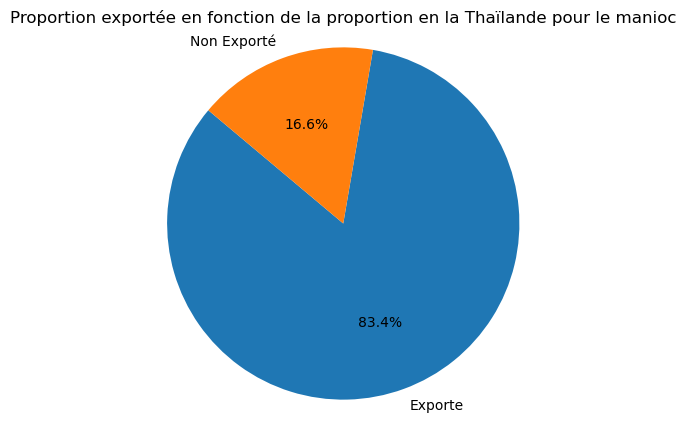

In [324]:
labels = ['Exporte', 'Non Exporté']
sizes = [th_manioc_exp, th_manioc_prod - th_manioc_exp]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion exportée en fonction de la proportion en la Thaïlande pour le manioc')
plt.show()


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 6 - Analyse complémentaires</h2>
</div>

In [325]:
#Rajouter en dessous toutes les analyses complémtaires suite à la demande de mélanie :
#"et toutes les infos que tu trouverais utiles pour mettre en relief les pays qui semblent être 
#le plus en difficulté au niveau alimentaire"

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 7 - Analyse complémentaires à présenter</h2>
</div>

In [326]:
print("Le nombre total de personnes en état de sous-nutrition dans le monde en 2017 est de :", total_personnes_sous_nutrition_2.round(2), "kg")

Le nombre total de personnes en état de sous-nutrition dans le monde en 2017 est de : 535700000.0 kg


Notre resultat n'est pas en accord avec ce qui est mentionné sur le site de l'ONU, pour cela nous allons essayer de comprendre et trouver une explication.

In [327]:
#Importation du fichier original sous_nutrition.csv
sous_nutrition = pd.read_csv(r'D:\data docs\OPC\P4\DAN-P4-FAO\sous_nutrition.csv')
#Réexaminer le jeu de données : sous_nutrition
sous_nutrition.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


Cela nous indique un manque au niveau de certaines données, voyons voir en détail :

In [328]:
print ('taux valeurs NA de dans notre DF sous_nutrition '"{:.2f} %".format(sous_nutrition['Valeur'].isna().mean()))

taux valeurs NA de dans notre DF sous_nutrition 0.49 %


Ce résultat souligne un manque de données significatif, expliquant ainsi la grande disparité entre nos résultats et ceux fournis par l'ONU !

<div style="background-color: RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color:#fff; ">Etape 7.1 - Analyse alimentaire</h3>
</div>

Identification des produits dont les pays en sous-nutrition ont le plus bénéficié durant la periode 2013 et 2018

Rappel des pays en sous nutrition

In [329]:
sous_pays_pires_10

,Zone,Proportion
78,Haïti,48.259182
157,République populaire démocratique de Corée,47.188685
108,Madagascar,41.062924
103,Libéria,38.279742
100,Lesotho,38.249438
183,Tchad,37.957606
161,Rwanda,35.055619
121,Mozambique,32.810898
186,Timor-Leste,32.173531
0,Afghanistan,28.928718


In [330]:
nut_pp = pd.merge(sous_pays_pires_10,dispo_alimentaire,how='inner', on ='Zone' ) 
nut_pp

,Zone,Proportion,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Haïti,48.259182,Abats Comestible,animale,1000000.0,0.0,4.0,1.46,0.12,0.73,16000000.0,0.0,5000000.0,15000000.0,0.0,11000000.0,0.0,0.0,0.0
1,Haïti,48.259182,"Agrumes, Autres",vegetale,0.0,0.0,0.0,0.41,0.00,0.00,4000000.0,0.0,4000000.0,4000000.0,0.0,0.0,0.0,0.0,0.0
2,Haïti,48.259182,"Alcool, non Comestible",vegetale,0.0,1000000.0,0.0,0.00,0.00,0.00,1000000.0,0.0,1000000.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Haïti,48.259182,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.07,0.01,0.03,1000000.0,0.0,1000000.0,1000000.0,0.0,0.0,0.0,0.0,0.0
4,Haïti,48.259182,Ananas,vegetale,0.0,0.0,1.0,0.59,0.00,0.00,7000000.0,0.0,0.0,6000000.0,1000000.0,7000000.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,Afghanistan,28.928718,Viande de Bovins,animale,0.0,0.0,27.0,4.59,2.10,1.89,140000000.0,0.0,6000000.0,140000000.0,0.0,134000000.0,0.0,0.0,0.0
734,Afghanistan,28.928718,Viande de Volailles,animale,0.0,0.0,9.0,2.45,0.53,0.87,75000000.0,0.0,48000000.0,75000000.0,0.0,26000000.0,0.0,0.0,0.0
735,Afghanistan,28.928718,"Viande, Autre",animale,0.0,0.0,1.0,0.38,0.06,0.17,12000000.0,0.0,0.0,12000000.0,0.0,12000000.0,0.0,0.0,0.0
736,Afghanistan,28.928718,Vin,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
aide_alimentaire_z_v = aide_alimentaire.groupby('Produit').sum('Valeur')
aide_alimentaire_z_v.reset_index(inplace=True)
aide_alimentaire_z_v.set_index('Produit', inplace=True)



In [332]:
df_cereales

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
7,Afghanistan,Blé,vegetale,0.0,0.0,1369.0,160.23,4.69,36.91,5.992000e+09,0.0,1.173000e+09,4.895000e+09,775000000.0,5.169000e+09,322000000.0,0.0,-350000000.0
12,Afghanistan,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
32,Afghanistan,Maïs,vegetale,200000000.0,0.0,21.0,2.50,0.30,0.56,3.130000e+08,0.0,1.000000e+06,7.600000e+07,31000000.0,3.120000e+08,5000000.0,0.0,0.0
34,Afghanistan,Millet,vegetale,0.0,0.0,3.0,0.40,0.02,0.08,1.300000e+07,0.0,0.000000e+00,1.200000e+07,1000000.0,1.300000e+07,0.0,0.0,0.0
40,Afghanistan,Orge,vegetale,360000000.0,0.0,26.0,2.92,0.24,0.79,5.240000e+08,0.0,1.000000e+07,8.900000e+07,52000000.0,5.140000e+08,22000000.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15545,Îles Salomon,"Céréales, Autres",vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15568,Îles Salomon,Maïs,vegetale,0.0,0.0,1.0,0.15,0.01,0.03,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.0
15575,Îles Salomon,Orge,vegetale,0.0,0.0,0.0,0.07,0.00,0.01,1.000000e+06,0.0,1.000000e+06,0.000000e+00,0.0,0.000000e+00,0.0,1000000.0,0.0
15591,Îles Salomon,Riz (Eq Blanchi),vegetale,0.0,12000000.0,623.0,63.76,1.36,10.90,4.900000e+07,0.0,4.700000e+07,3.600000e+07,1000000.0,3.000000e+06,0.0,0.0,0.0


On remarque ici que les céréales ont une place importante, voyons quel est la proportion :

In [333]:
aide_alimentaire_z_v['Proportion'] = aide_alimentaire_z_v['Valeur']/aide_alimentaire_z_v['Valeur'].sum()
aide_alimentaire_z_v

,Année,Valeur,Proportion
Produit,,,
Autres non-céréales,241685,48871000,0.004428
Blé et Farin,116813,1781515000,0.161429
BulgurFarEnt,48333,140547000,0.012735
Céréales,402813,4256884000,0.385731
Céréales Secondaires,122852,1166565000,0.105706
"Fruits secs, total",78563,9386000,0.000850
Graisses Com,2013,50000,0.000005
Huiles végétales,360509,344973000,0.031259
"Lait, total",46320,12478000,0.001131


In [334]:
aide_alimentaire_z_v

,Année,Valeur,Proportion
Produit,,,
Autres non-céréales,241685,48871000,0.004428
Blé et Farin,116813,1781515000,0.161429
BulgurFarEnt,48333,140547000,0.012735
Céréales,402813,4256884000,0.385731
Céréales Secondaires,122852,1166565000,0.105706
"Fruits secs, total",78563,9386000,0.000850
Graisses Com,2013,50000,0.000005
Huiles végétales,360509,344973000,0.031259
"Lait, total",46320,12478000,0.001131


In [335]:
aide_alimentaire_z_v.reset_index(inplace=True)
aide_alimentaire_z_v.rename(columns={'index': 'Produit'}, inplace=True)


In [336]:
aide_alimentaire_z_v

,Produit,Année,Valeur,Proportion
0,Autres non-céréales,241685,48871000,0.004428
1,Blé et Farin,116813,1781515000,0.161429
2,BulgurFarEnt,48333,140547000,0.012735
3,Céréales,402813,4256884000,0.385731
4,Céréales Secondaires,122852,1166565000,0.105706
5,"Fruits secs, total",78563,9386000,0.000850
6,Graisses Com,2013,50000,0.000005
7,Huiles végétales,360509,344973000,0.031259
8,"Lait, total",46320,12478000,0.001131
9,"Légumineuses Sèches,Tot.",344400,737398000,0.066818


In [337]:
aide_alimentaire_z_v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Produit     16 non-null     object 
 1   Année       16 non-null     int64  
 2   Valeur      16 non-null     int64  
 3   Proportion  16 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 644.0+ bytes


In [338]:
aide_alimentaire_z_v_trie = aide_alimentaire_z_v.sort_values(by='Proportion', ascending=False)
print("Les produits pour lesquels les pays ont le plus bénéficié :")
print(aide_alimentaire_z_v_trie[['Produit', 'Proportion']])

Les produits pour lesquels les pays ont le plus bénéficié :
                     Produit  Proportion
3                   Céréales    0.385731
1               Blé et Farin    0.161429
11              Non-céréales    0.114310
4       Céréales Secondaires    0.105706
13                Riz, total    0.067273
9   Légumineuses Sèches,Tot.    0.066818
10  Mélanges et préparations    0.038587
7           Huiles végétales    0.031259
2               BulgurFarEnt    0.012735
14              Sucre, total    0.009153
0        Autres non-céréales    0.004428
8                Lait, total    0.001131
5         Fruits secs, total    0.000850
12              Poiss&produi    0.000580
15              Viande Total    0.000005
6               Graisses Com    0.000005


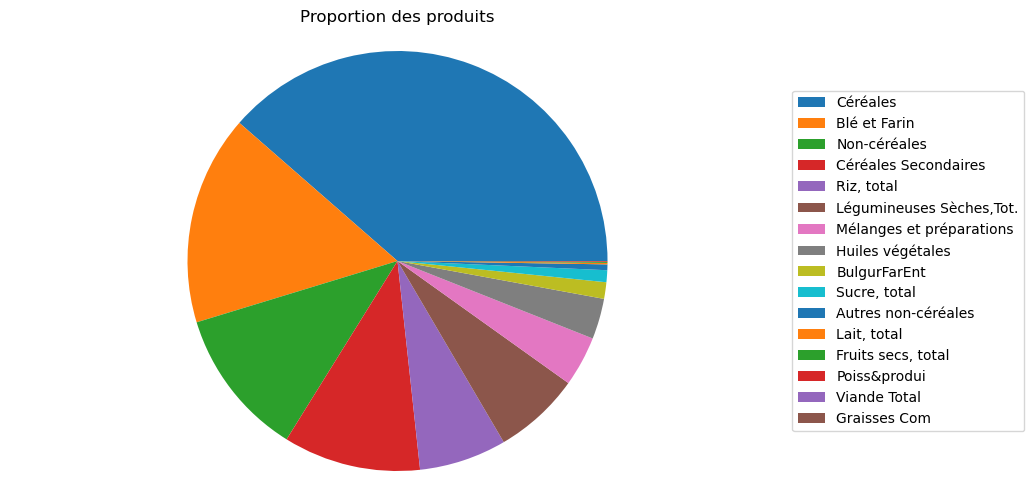

In [339]:
plt.figure(figsize=(10, 6))
seuil_min = 0.009
plt.pie(aide_alimentaire_z_v_trie['Proportion'])
plt.title('Proportion des produits')
plt.legend(aide_alimentaire_z_v_trie['Produit'],loc='center left', bbox_to_anchor=(1, 0.5))
plt.axis('equal')
plt.show()

In [340]:
# Calcul proportion céréales dans aides
liste_cereales_aides = ['Céréales', 'Blé et Farin', 'Céréales Secondaires', 'Riz, total']
somme_cereales_aides = aide_alimentaire_z_v.loc[aide_alimentaire_z_v['Produit'].isin(liste_cereales_aides), 'Valeur'].sum()
part_cereales_aides = somme_cereales_aides / aide_alimentaire_z_v['Valeur'].sum()
print('Proportion céréales dans aides {:.1%}  '.format(part_cereales_aides))

Proportion céréales dans aides 72.0%  
